In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost shap lime

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 1.2 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 1.0 MB/s eta 0:00:0000:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=07037f12fa85337cca4fda88d895eba2b7b1efc014db18c1416ee639d563868d
  Stored in directory: /home/mparraf/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Inline plots
%matplotlib inline

# Configuración general
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-v0_8')

print("✅ Librerías importadas correctamente.")

✅ Librerías importadas correctamente.


In [3]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [4]:
from src.utils import cargar_y_preprocesar_credit

X_train, X_test, y_train, y_test = cargar_y_preprocesar_credit()
print(f"✅ Datos listos: X_train={X_train.shape}, X_test={X_test.shape}")

🔹 Iniciando pipeline para el dataset 'credit'
📥 Cargando dataset 'credit' desde OpenML...
✅ Dataset cargado con 16714 filas y 11 columnas.
🎯 Columna target detectada: 'SeriousDlqin2yrs'
✅ No se encontraron valores nulos explícitos.
🔍 Columnas categóricas: 0 → []
🔍 Columnas numéricas: 10 → ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
✅ División realizada: X_train=(13371, 10), X_test=(3343, 10)
✅ Datos listos: X_train=(13371, 10), X_test=(3343, 10)


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
from src.modelos import entrenar_logistic_regression, entrenar_random_forest

resultados_logistic = entrenar_logistic_regression(X_train, y_train, X_test, y_test)
resultados_rf = entrenar_random_forest(X_train, y_train, X_test, y_test)

🔧 Entrenando Regresión Logística con regularización...


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mparraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:35

✅ Logistic Regression entrenado. Accuracy=0.7287, AUC=0.7941
🔧 Entrenando Random Forest...
✅ Random Forest entrenado. Accuracy=0.7786, AUC=0.8584


/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo5Clase6EvalModMarcoParra/src/visualizador.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


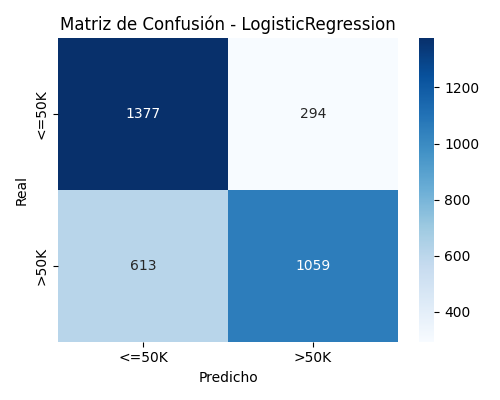

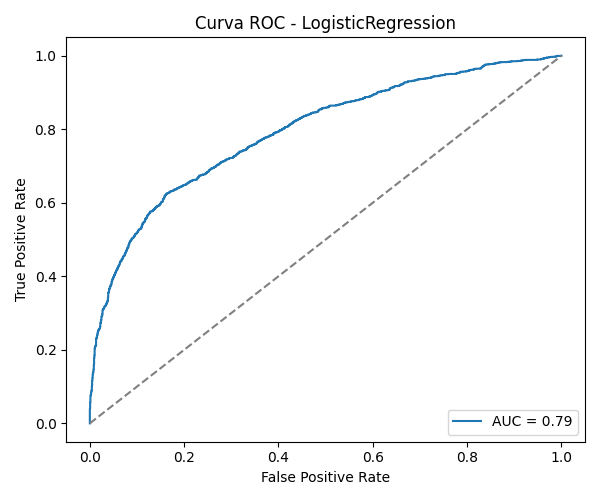

⚠️ Imagen no encontrada: ../outputs/feature_importance_logisticregression.png


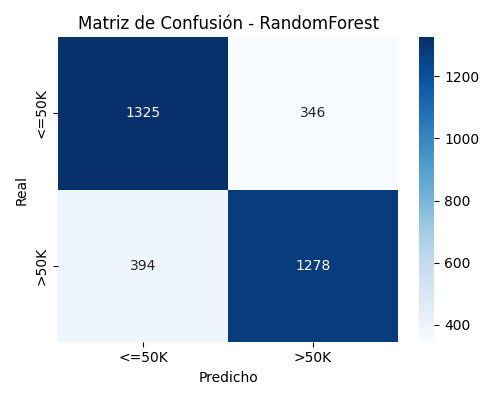

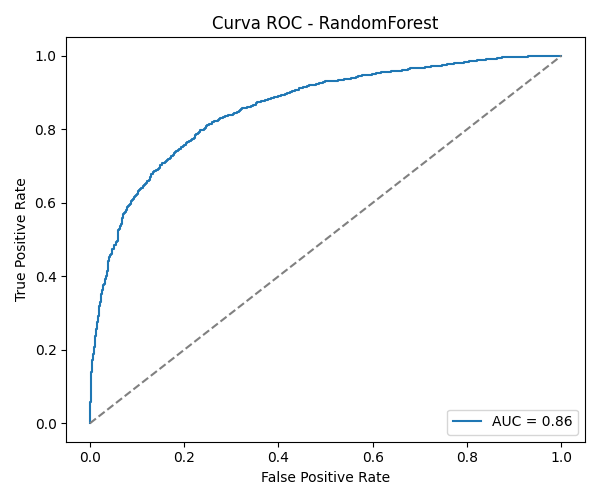

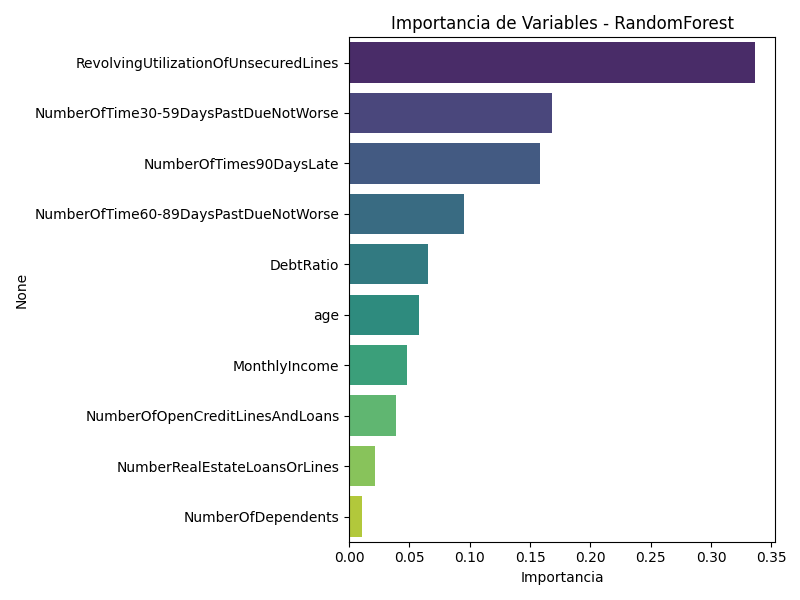

In [7]:
imagenes = [
    "../outputs/confusion_matrix_logisticregression.png",
    "../outputs/roc_curve_logisticregression.png",
    "../outputs/feature_importance_logisticregression.png",
    "../outputs/confusion_matrix_randomforest.png",
    "../outputs/roc_curve_randomforest.png",
    "../outputs/feature_importance_randomforest.png",
]

for img in imagenes:
    if os.path.exists(img):
        display(Image(filename=img))
    else:
        print(f"⚠️ Imagen no encontrada: {img}")